# 训练及测试
本笔记本将调用hw1/hw2以作出训练结果，亦可直接导出训练代码供使用。

首先，引入必要的依赖。
TODO：删去opencv

In [2]:
import cv2, matplotlib, scipy.ndimage
import numpy as np
import numpy.linalg as npMat
import matplotlib.pyplot as plt

import sys, os, time

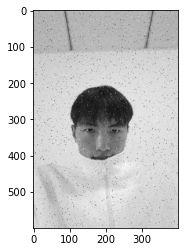

In [4]:
imAll = None
for i in range(1, 10 + 1):
    imMatrix = cv2.imread("../dataset/s16/s16_{}.jpg".format(i))
    imMatrix = cv2.cvtColor(imMatrix, 
        # cv2.COLOR_BGR2RGB # opencv read image as BGR colorspace
        cv2.COLOR_BGR2GRAY # weighted mean, like ./hw1.py#68
        )
    if isinstance(imAll, np.ndarray):
        try:
            imAll = np.append(imAll, [imMatrix], axis=0)
        except ValueError:
            print("[INFO] error when i = {}".format(i))
    else:
        imAll = np.array([imMatrix])
    # print(imAll)
# print(imAll)
plt.imshow(imAll[6], cmap=plt.cm.gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
imAll.resize((imAll.shape[0], imAll.shape[1] * imAll.shape[2]))
# imAllFlat = np.reshape(imAll, (-1, imAll.size()))
# print(imAllFlat)

## 降维

PCA 的核心步骤：计算主成分（特征值更大的特征向量），然后通过矩阵相乘 $P \cdot A$ 得 $Q$ 。

其中阐述原理：方便你的方差计算、协方差计算，so作中心化 / 零均值化。

补充分析：主成分贡献率。

In [5]:
imageFeature = imAll
matMean = imageFeature - np.tile(imageFeature.mean(1), (imageFeature.shape[1], 1)).T
matCovaiance = np.dot(matMean, matMean.T) # only after zero-mean
eigValue, eigNormalizedVector = npMat.eig(matCovaiance)
print(eigValue)

[2.24379084e+09 6.96454553e+08 3.20982648e+08 2.51278653e+08
 2.01797531e+08 1.76714959e+08 1.36838771e+08 1.22397948e+08
 9.20001089e+07 8.39759702e+07]
